
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [3]:

# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.
(x_train, _), (x_test, _) = mnist.load_data()

# Outpur about input data
print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


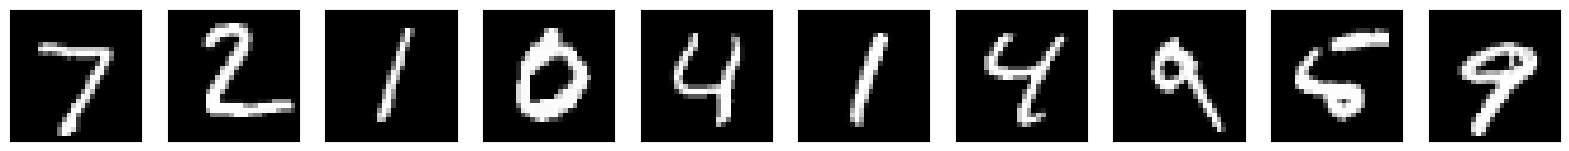

In [4]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [5]:
# Normalize train data - Divide by 255
# Normalize test data - Divide by 255

x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

print(f'Before train: {x_train.shape}')
print(f'Before test: {x_test.shape}')

# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# print(f'After train: {x_train.shape}')
# print(f'After test: {x_test.shape}')

Before train: (60000, 28, 28)
Before test: (10000, 28, 28)


## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [6]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

#
# Add as many hidden layers in the encoder network of your choise
encoder.add(Dense(128, activation='relu'))
encoder.add(Dense(64, activation='relu'))
encoder.add(Dense(25, activation='relu'))

# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.

In [7]:
# print the encoder model
print(encoder.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
Total params: 110361 (431.10 KB)
Trainable params: 110361 (431.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [8]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
decoder.add(Dense(128, activation='relu'))
decoder.add(Dense(256, activation='relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [9]:
# print the decoder model
print(decoder.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                1300      
                                                                 
 dense_4 (Dense)             (None, 128)               6528      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 784)               201488    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 242340 (946.64 KB)
Trainable params: 242340 (946.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [10]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.

In [11]:
# print the autoencoder model
print(autoencoder.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 25)                110361    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            242340    
                                                                 
Total params: 352701 (1.35 MB)
Trainable params: 352701 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [13]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.
from tensorflow.keras.optimizers import Adam

autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [14]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
autoencoder.fit(
    x_train,
    x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/10
235/235 [==============================] - 3s 9ms/step - loss: 0.2433 - accuracy: 0.1111 - val_loss: 0.1689 - val_accuracy: 0.1706
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1513 - accuracy: 0.1937 - val_loss: 0.1367 - val_accuracy: 0.2107
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1305 - accuracy: 0.2215 - val_loss: 0.1239 - val_accuracy: 0.2244
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1222 - accuracy: 0.2333 - val_loss: 0.1175 - val_accuracy: 0.2369
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1170 - accuracy: 0.2413 - val_loss: 0.1137 - val_accuracy: 0.2455
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1136 - accuracy: 0.2475 - val_loss: 0.1109 - val_accuracy: 0.2504
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1107 - accuracy: 0.2521 - val_loss: 0.1081 - val_accuracy: 0.2524
Epo

313/313 [==============================] - 0s 921us/step


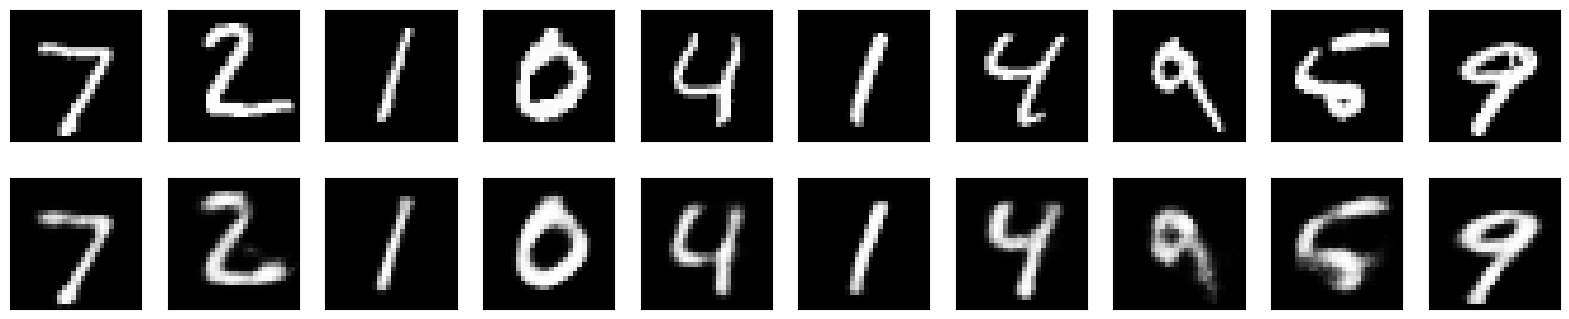

In [19]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # 
    # Display original image - Just line sample code provided earlier.
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [20]:
from tensorflow.keras.layers import GaussianNoise

In [21]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

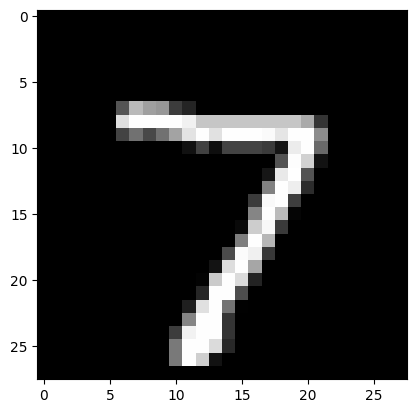

In [22]:
plt.imshow(x_test[0])

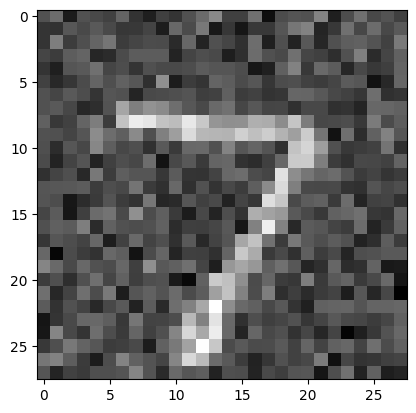

In [23]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [27]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image

# Add additional layers of the encoder network
encoder.add(Dense(128, activation='relu'))
encoder.add(Dense(64, activation='relu'))
encoder.add(Dense(25, activation='relu'))

encoder.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 gaussian_noise_2 (Gaussian  (None, 784)               0         
 Noise)                                                          
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 25)                1625      
                                                                 
Total params: 110361 (431.10 KB)
Trainable params: 110361 (431.10 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [28]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add additional layers of the decoder network
decoder.add(Dense(128, activation='relu'))
decoder.add(Dense(256, activation='relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

decoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 50)                1300      
                                                                 
 dense_18 (Dense)            (None, 128)               6528      
                                                                 
 dense_19 (Dense)            (None, 256)               33024     
                                                                 
 dense_20 (Dense)            (None, 784)               201488    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 242340 (946.64 KB)
Trainable params: 242340 (946.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
noise_remover = Sequential([encoder, decoder])

In [30]:
# Compile the network as earlier

noise_remover.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [31]:
# Fit the network as earlier.
"""
    autoencoder.fit(
    x_train,
    x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)
"""
noise_remover.fit(
    x_train,
    x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2411 - accuracy: 0.1159 - val_loss: 0.1636 - val_accuracy: 0.1725
Epoch 2/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1529 - accuracy: 0.1910 - val_loss: 0.1384 - val_accuracy: 0.2081
Epoch 3/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1369 - accuracy: 0.2123 - val_loss: 0.1261 - val_accuracy: 0.2256
Epoch 4/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1276 - accuracy: 0.2270 - val_loss: 0.1190 - val_accuracy: 0.2359
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1216 - accuracy: 0.2359 - val_loss: 0.1137 - val_accuracy: 0.2448
Epoch 6/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1175 - accuracy: 0.2420 - val_loss: 0.1106 - val_accuracy: 0.2443
Epoch 7/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1148 - accuracy: 0.2468 - val_loss: 0.1079 - val_accuracy: 0.2524
Epoch 

In [32]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


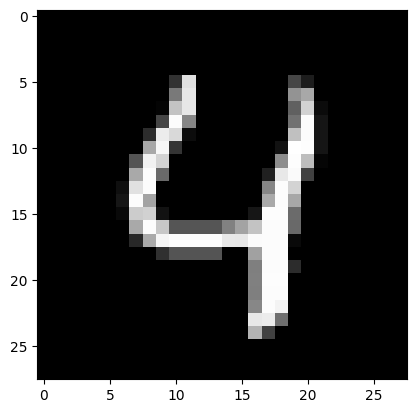

The Noisey Version


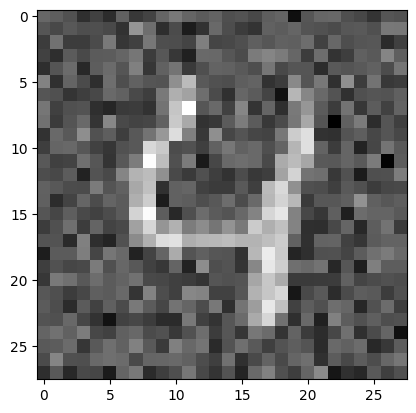

After going through denoiser


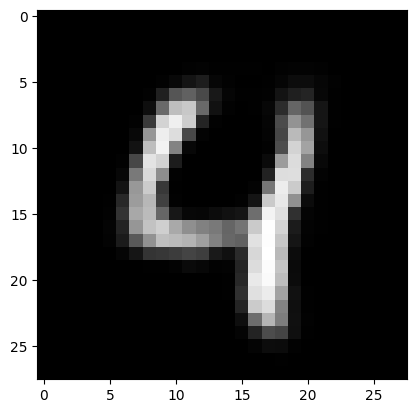

In [33]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.